# Technisches und Vorwissen

## Libaries and imports

Zur Analyse benutzen wir die Programmiersprache Python sowie diverse weitere Bibliotheken zur Datenanalyse die als "PyData"-Stack zusammengefasst werden. [PyData](https://pydata.org/) ist darüber hinaus auch eine Community welche Veranstalltungen wie Vorträge, Meetups und Konferenzen organisiert.

In [1]:
# Data Structures
import numpy as np
import pandas as pd
import sklearn

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook Magic
#sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.pylabtools import figsize

![Libraries](static/libs.png)

## Grundlage Python + Jupyter

* Mehr Beispiele und Erklärungen zu Python: https://learnxinyminutes.com/docs/python/
* Eine Einführung zu JupyterLab von mir: https://www.youtube.com/watch?v=aSChciAOvcE

In [2]:
talk_title = "Einführung in datengetriebene Projekte"

In [3]:
type(talk_title)

str

In [4]:
my_list = [1, 2, 3, talk_title]

In [5]:
my_list[3]

'Einführung in datengetriebene Projekte'

In [6]:
my_list[:2]

[1, 2]

In [7]:
my_talk = {"author": "Nico Kreiling", "title": talk_title, "date": "17.2.2020"}   
marcels_talk = {"author": "Marcel Kurovski", "title": "Recommender Systems", "date": "19.2.2020"}   
inovex_talks = [my_talk, marcels_talk]

In [8]:
my_talk

{'author': 'Nico Kreiling',
 'title': 'Einführung in datengetriebene Projekte',
 'date': '17.2.2020'}

In [9]:
for talk in inovex_talks:
    print(f'{talk["author"]} hält am {talk["date"]} einen Vortrag zu "{talk["title"]}"')

Nico Kreiling hält am 17.2.2020 einen Vortrag zu "Einführung in datengetriebene Projekte"
Marcel Kurovski hält am 19.2.2020 einen Vortrag zu "Recommender Systems"


In [10]:
tage_mit_inovex_vortrag = [talk["date"] for talk in inovex_talks]
print(set(tage_mit_inovex_vortrag))

{'19.2.2020', '17.2.2020'}


In [11]:
df = pd.DataFrame(inovex_talks)
df

,author,title,date
0,Nico Kreiling,Einführung in datengetriebene Projekte,17.2.2020
1,Marcel Kurovski,Recommender Systems,19.2.2020


In [12]:
print(type(df))
print(type(df.author))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Survive on the Titanic


**Vorgehensweise**

Unser Vorgehen innerhalb dieses Workshops orientiert sich am [CRISP-DM](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining), einem industrie unabhängigen Standarad zum Vorgehen in Data Science (ursprünglich Data Mining) Projekten.

Dieser beschreibt ein iteratives Vorgehen, bei dem nach einem inhaltlichen Verständnis der Aufgabe die Daten mit einer explorativen Analyse untersucht werden. Sind die Daten und das Anforderung in einklang startet eine Modell-Entwicklungsphase, bei dem die Daten so aufbereitet werden, dass darauf basierend ein oder mehrere maschinelle Lernverfahren angewandt werden können. Entspricht dieses Modell einer ausreichenden offline güte wird es in einem entsprechendem A/B Test evaluiert und anschließend produktiviert.

![Crisp DM](static/crisp_dm.png)

# Business Understanding

In dieser Phase geht es darum, die eigentliche Aufgabe zu verstehen, um ein angemessenes Vorgehen zu bestimmen.

## Titanic

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

In [1]:
from IPython.display import HTML
# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ItjXTieWKyI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')


/Users/nicokreiling/.local/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**Aufgabe:** Vorhersage, ob ein Passagier den Untergang der Titanic übrerlebt.
    
**Machine Learning Klassifikation**
* Supervised Machine Learning
* Klassifikation
* Binäre Klassifikation

**Keine Weiteren Einschränkungen:**

* Wir müssen nicht erklären, warum wir denken, dass ein Passagier stirbt oder überlebt (Explainability)
* Uns stehen theoretisch beliebige Rechenresourcen zur Verfügung
* Wir sind frei in der Technologiewahl
* Es gibt keine Gewichtung der Klassen

# Data Understanding

Mit diesem Vorwissen werden wir die gegebenen Daten analysen, um eine Aussage über die Machbarkeit der Aufgabe zu erlangen

## Data Loading

In [14]:
train = pd.read_csv("./data/titanic/train.csv")
test  = pd.read_csv("./data/titanic/test.csv")

In [15]:
train_raw = train.copy()
test_raw  = test.copy()

print("Train Dimensions:", train.shape)
print("Test Dimensions:", test.shape)

# preview the data
train.head()

Train Dimensions: (891, 12)
Test Dimensions: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
import qgrid
col_options = {
    'width': 70,
}

def qshow(df, ops=None):
    if ops is None:
        ops = dict(
            column_options=col_options,grid_options={'forceFitColumns': True}
        )
    return qgrid.show_grid(df, **ops)

#qshow(train)

In [17]:
#Columns that only exist in Trainingsset
set(train.columns)-set(test.columns)

{'Survived'}

In [18]:
# Get Datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
columns2drop = ["PassengerId"]
train[columns2drop].head()

,PassengerId
0,1
1,2
2,3
3,4
4,5


In [20]:
for df in [train, test]:
    df.drop(columns2drop, axis=1, inplace=True)

## Missing data

In [21]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

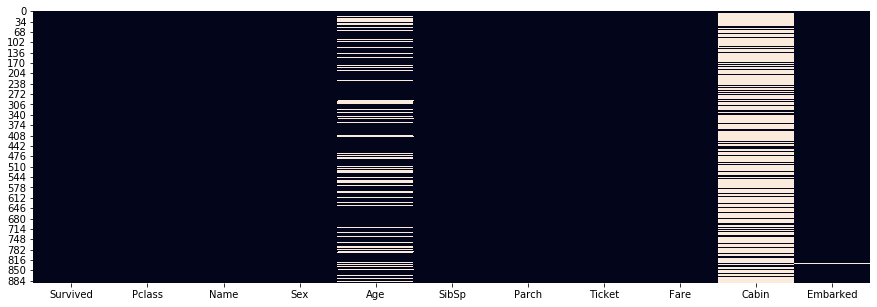

In [22]:
figsize(15,5)
sns.heatmap(train.isnull(), cbar=False)

In [23]:
print("training:",train.isnull().sum())
print("test:",test.isnull().sum())

training: Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
test: Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


## Zielvariable

In [24]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

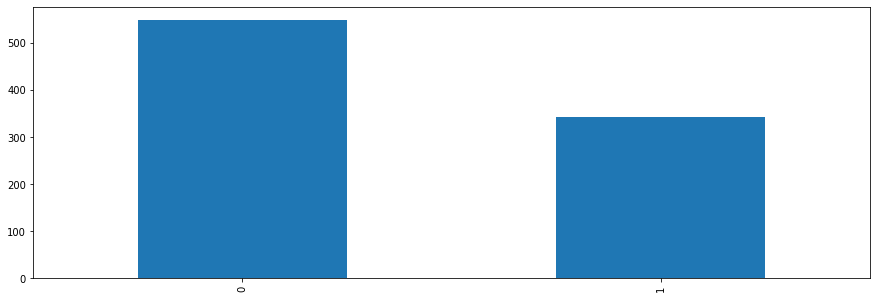

In [25]:
figsize(15,5)
train.Survived.value_counts().sort_index().plot(kind="bar")

## Abhängige Variablen

### Passanger Class (Pclass)

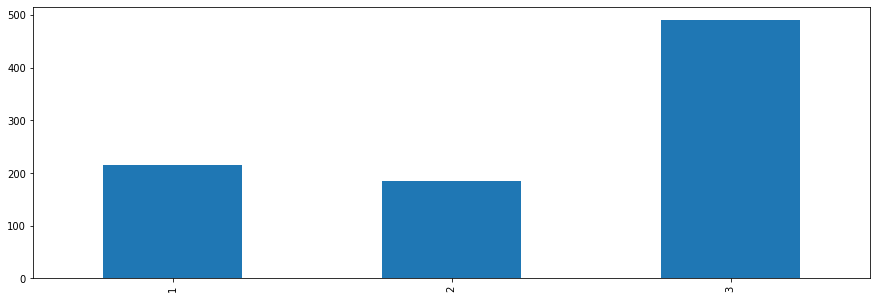

In [26]:
figsize(15,5)
train.Pclass.value_counts().sort_index().plot(kind="bar")

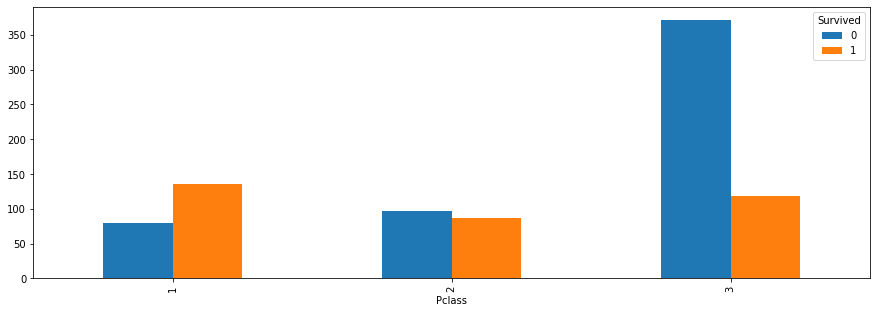

In [27]:
train.groupby(["Pclass","Survived"]).size().unstack("Survived").plot(kind="bar")

### Ticketpreis

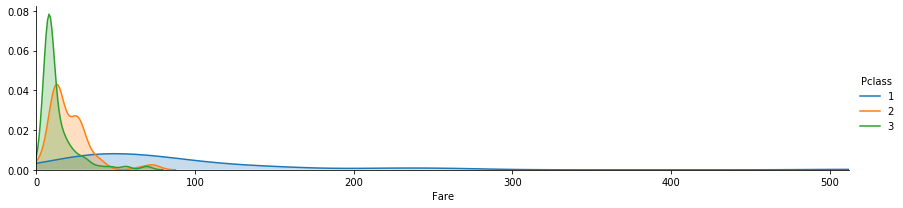

In [28]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

### Sex

In [29]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

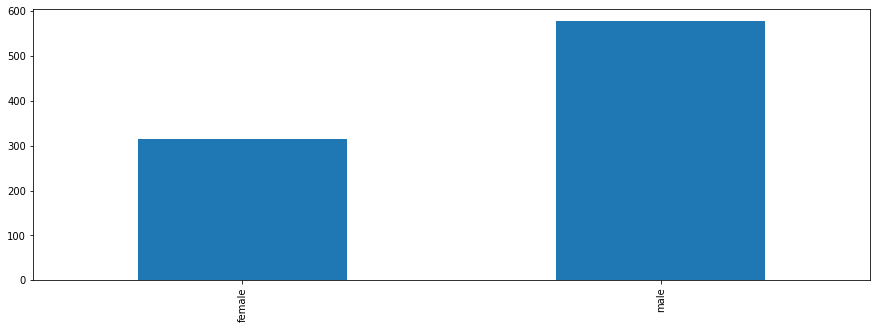

In [30]:
train.Sex.value_counts().sort_index().plot(kind="bar")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21b03f50>,
      dtype=object)

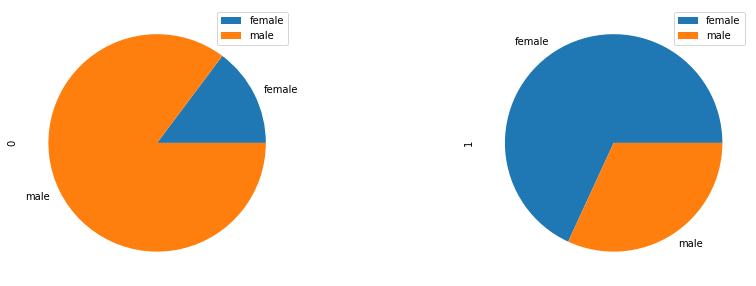

In [31]:
train.groupby(["Sex","Survived"]).size().unstack("Survived").plot(kind="pie", subplots=True)

### Age

In [32]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

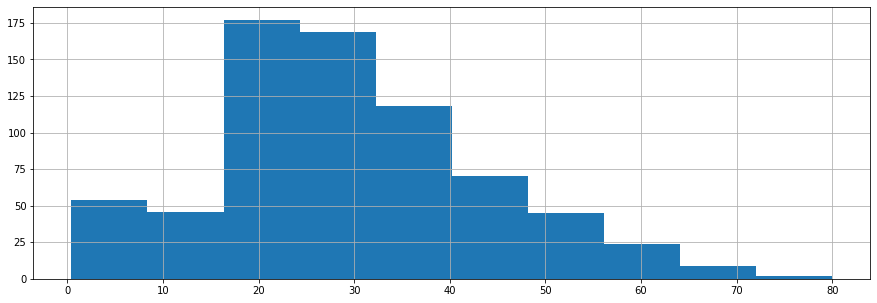

In [33]:
train.Age.hist()

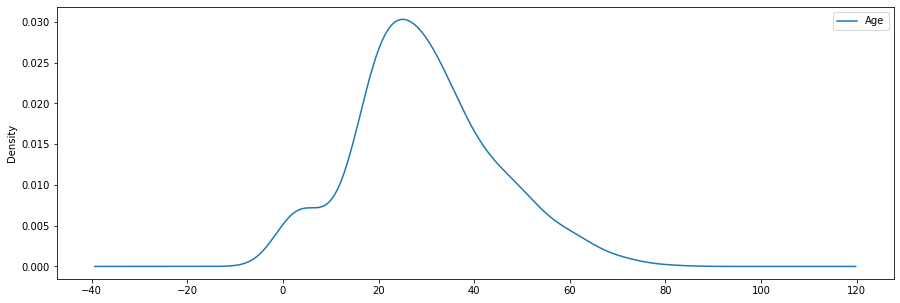

In [34]:
train.Age.to_frame().plot(kind="kde", bw_method=0.3)

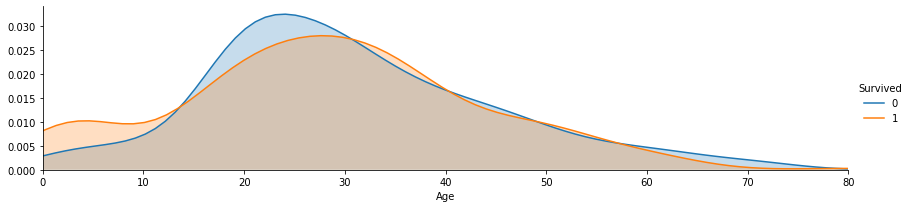

In [35]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

### Familienbeziehug

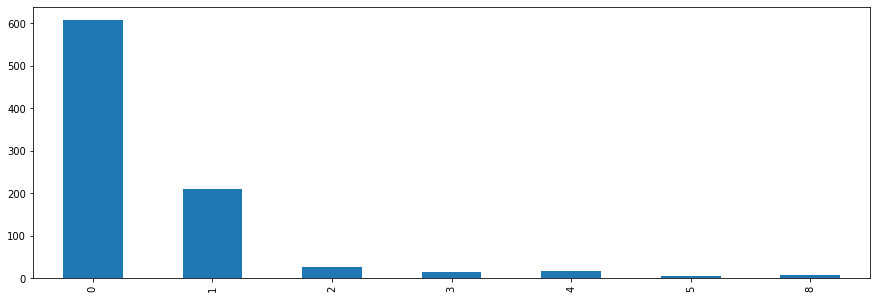

In [36]:
train.SibSp.value_counts().sort_index().plot(kind="bar")

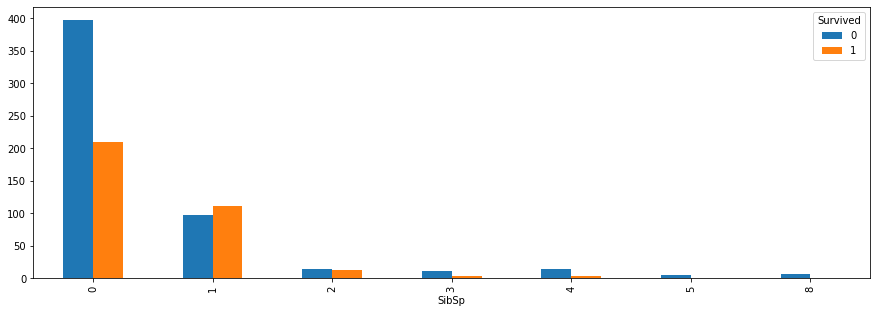

In [37]:
train.groupby(["SibSp","Survived"]).size().unstack("Survived").plot(kind="bar")

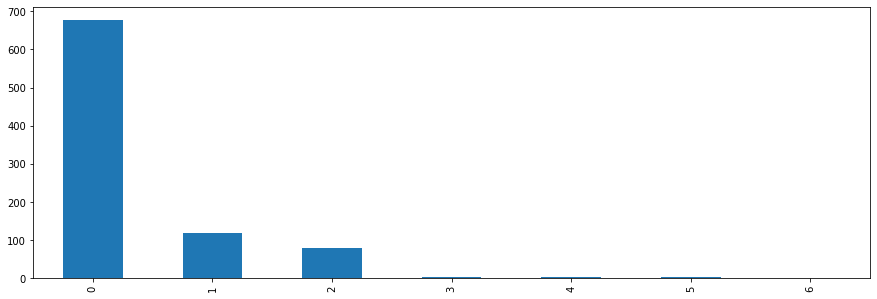

In [38]:
train.Parch.value_counts().sort_index().plot(kind="bar")

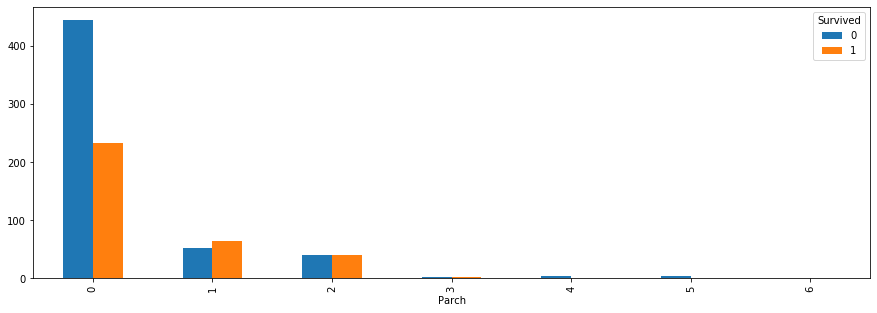

In [39]:
train.groupby(["Parch","Survived"]).size().unstack("Survived").plot(kind="bar")

## Interactives Dashboard mit Panel

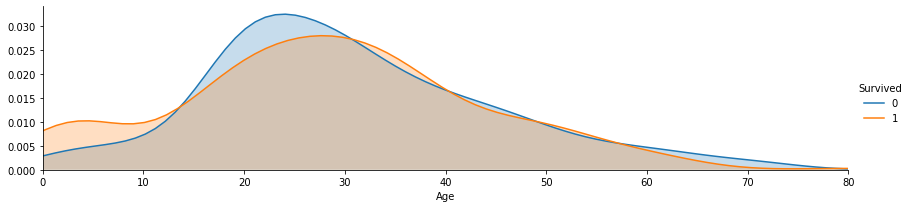

In [40]:
df = train
def plot_categorial(column):
    %matplotlib agg
    ab = df.groupby([column,"Survived"]).size().unstack("Survived").plot(kind="bar").get_figure()
    return ab

def plot_numerical(column):
    %matplotlib agg
    # peaks for survived/not survived passengers by their age
    facet = sns.FacetGrid(df, hue="Survived",aspect=4)
    facet.map(sns.kdeplot,column,shade= True)
    facet.set(xlim=(0, df[column].max()))
    facet.add_legend()
    return facet.fig
    
def plot_column(column):
    if df[column].dtype == np.float:
        fig = plot_numerical(column)
    else:
        fig = plot_categorial(column)
    return fig
    
fig = plot_column("Age")        

Column
    [0] Column
        [0] Select(name='column', options=['Pclass', 'Sex', ...], value='Pclass')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00006')
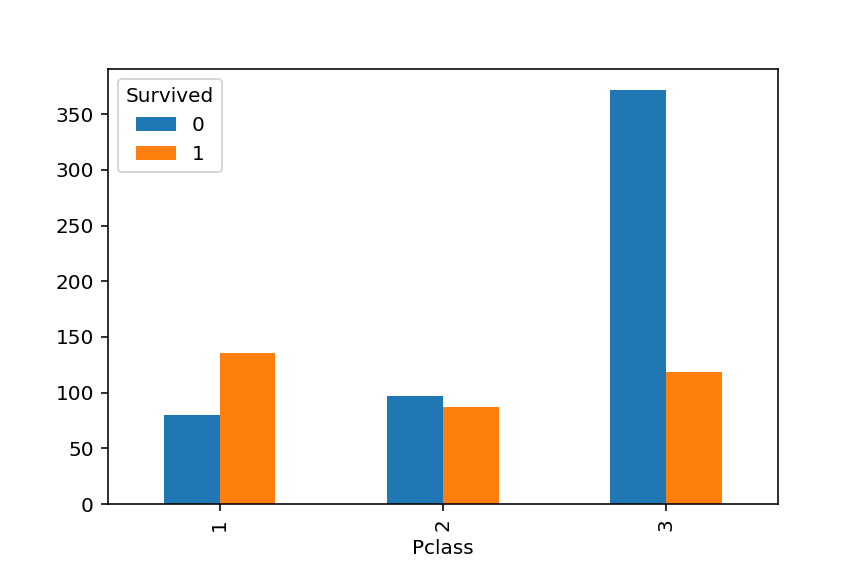

In [41]:
import panel as pn
pn.extension()
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
fig = pn.interact(plot_column, column=cols)
fig

## Aufgaben
* Sammele für dich interessante Erkentnisse und Ideen, die später bei der Prognose von Überlebenden hilfreich sein könnten.
* Analysiere die Spalte "Embarked" und versuche eine Erklärung zu finden, warum sich Hafen C von Q und S unterscheidet
* Erweitere das Dashboard um einen interaktiven Titel, der das dargestellte beschreibt.

### Erkentnisse der Datenanalyse

Menschen mit erhöhter Überlebenswahrscheinlichkeit
* Frauen
* Passagiere einer besseren Klasse
* Paare
* Kinder / Jugendliche (unter ~16 Jahren)

Sonstige Erkentnisse:
* die Klassen hatten unterschiedliche Preise
* der Datensatz ist leicht unbalanciert


### Warum sterben mehr Passagiere vom Abfahrtshafen C

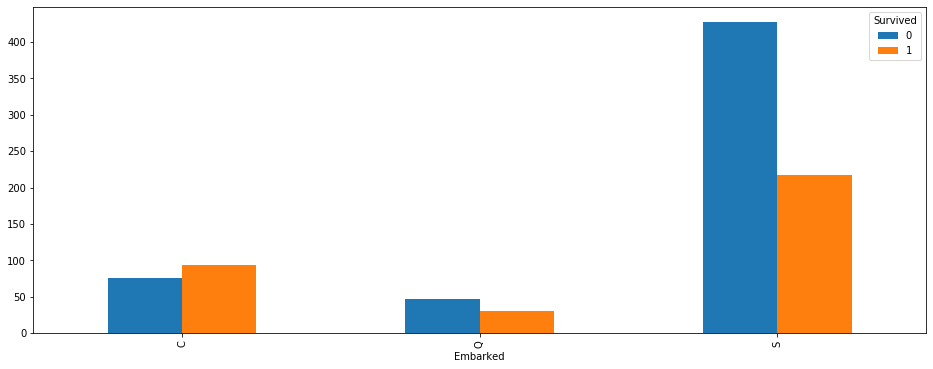

In [42]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6]

train.groupby("Embarked").Survived.value_counts().unstack("Survived").plot(kind="bar")

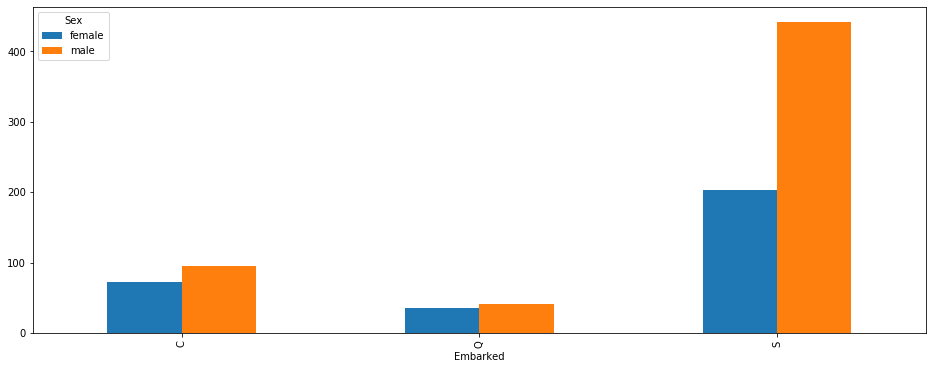

In [43]:
train.groupby("Embarked").Sex.value_counts().unstack("Sex").plot(kind="bar")

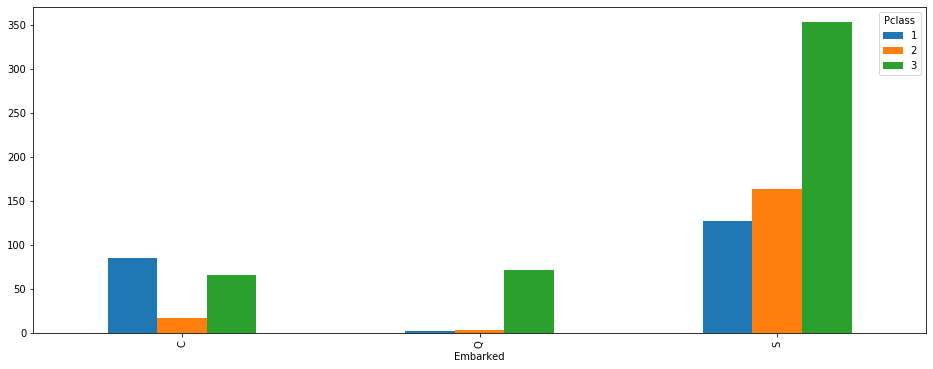

In [44]:
train.groupby("Embarked").Pclass.value_counts().unstack("Pclass").plot(kind="bar")

**Alternative:** Korrelationsplot

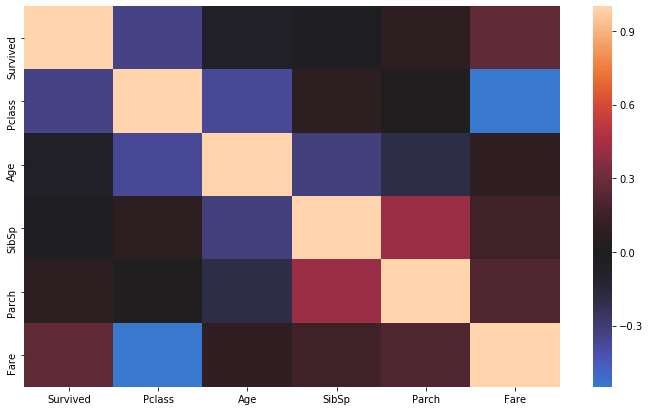

In [45]:
%matplotlib inline
figsize(12, 7)

sns.heatmap(train.corr(),center=0)

In [46]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

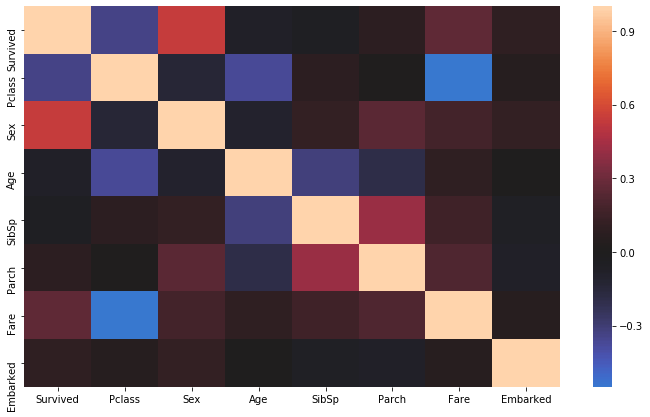

In [47]:
df = train.copy()
df["Sex"] = pd.factorize(df.Sex)[0]
df["Embarked"] = pd.factorize(df.Embarked)[0]
sns.heatmap(df.corr(),center=0)

### Erweiterung Dashboard

Column
    [0] Column
        [0] Select(name='column', options=['Pclass', 'Sex', ...], value='Pclass')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00018')
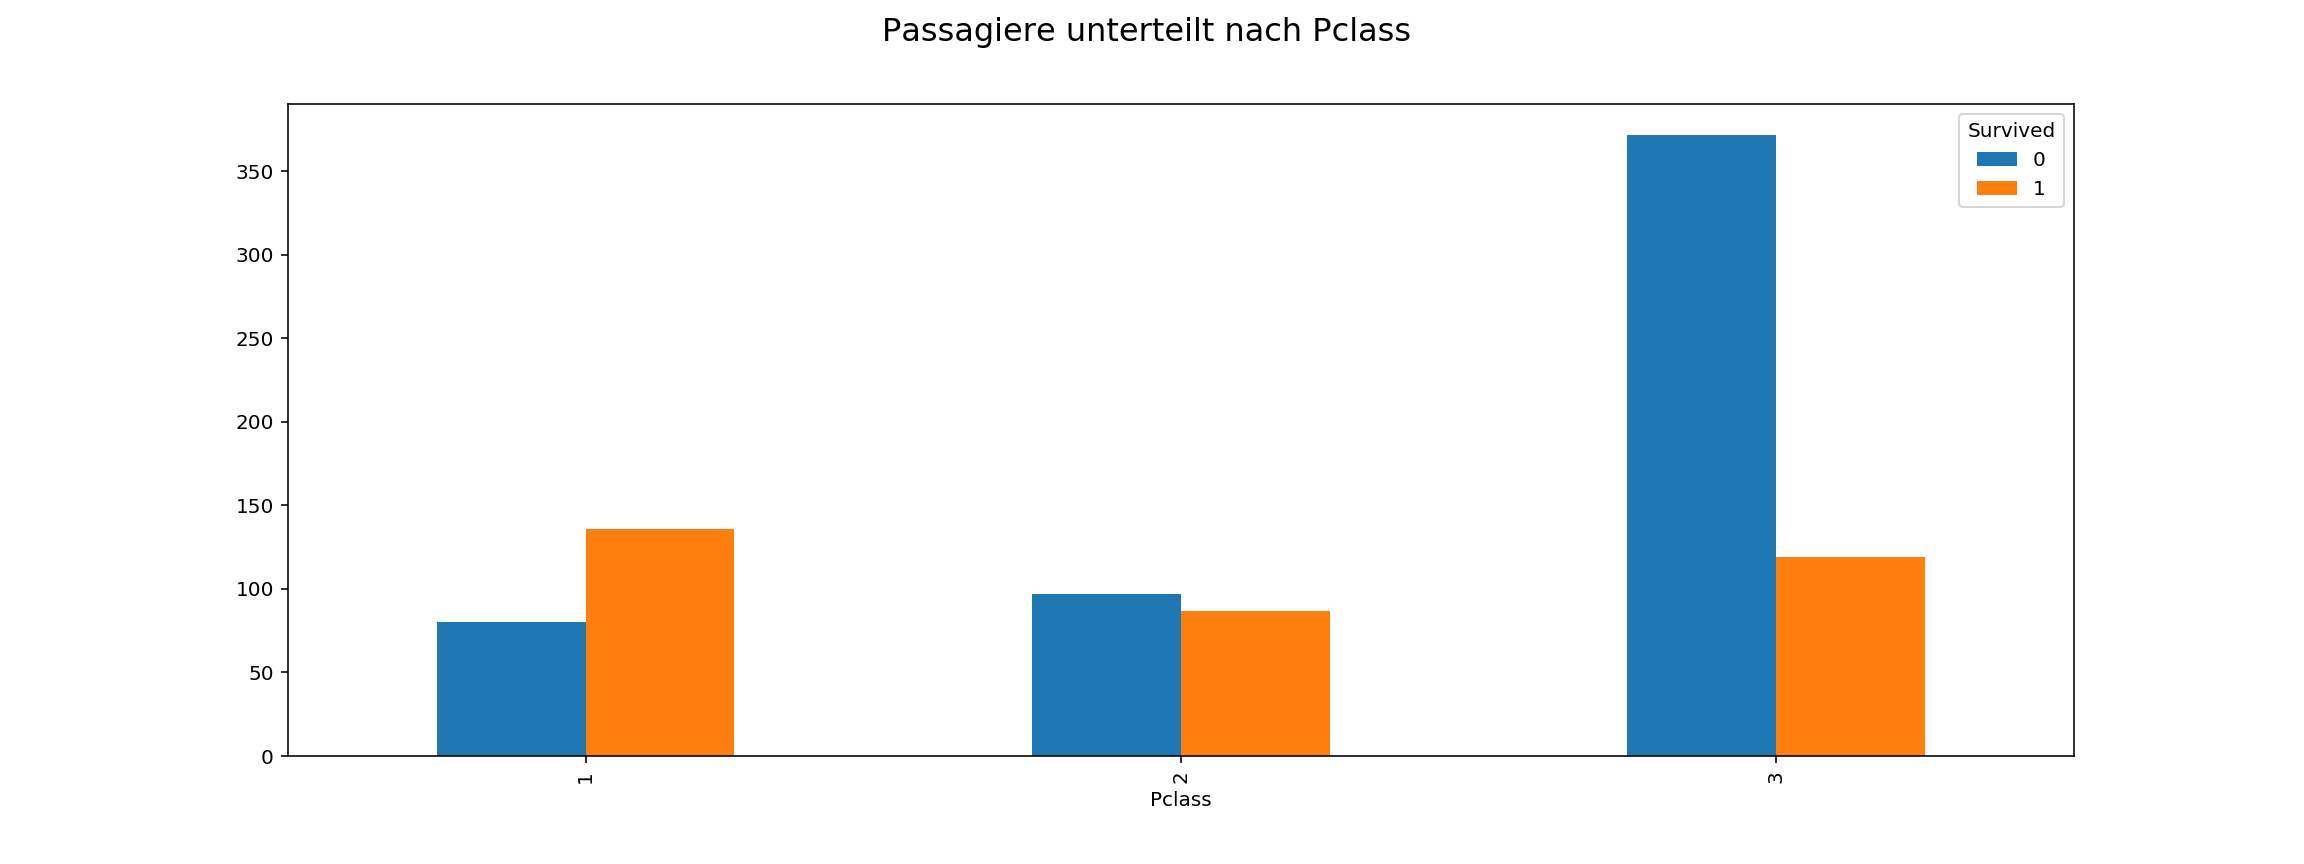

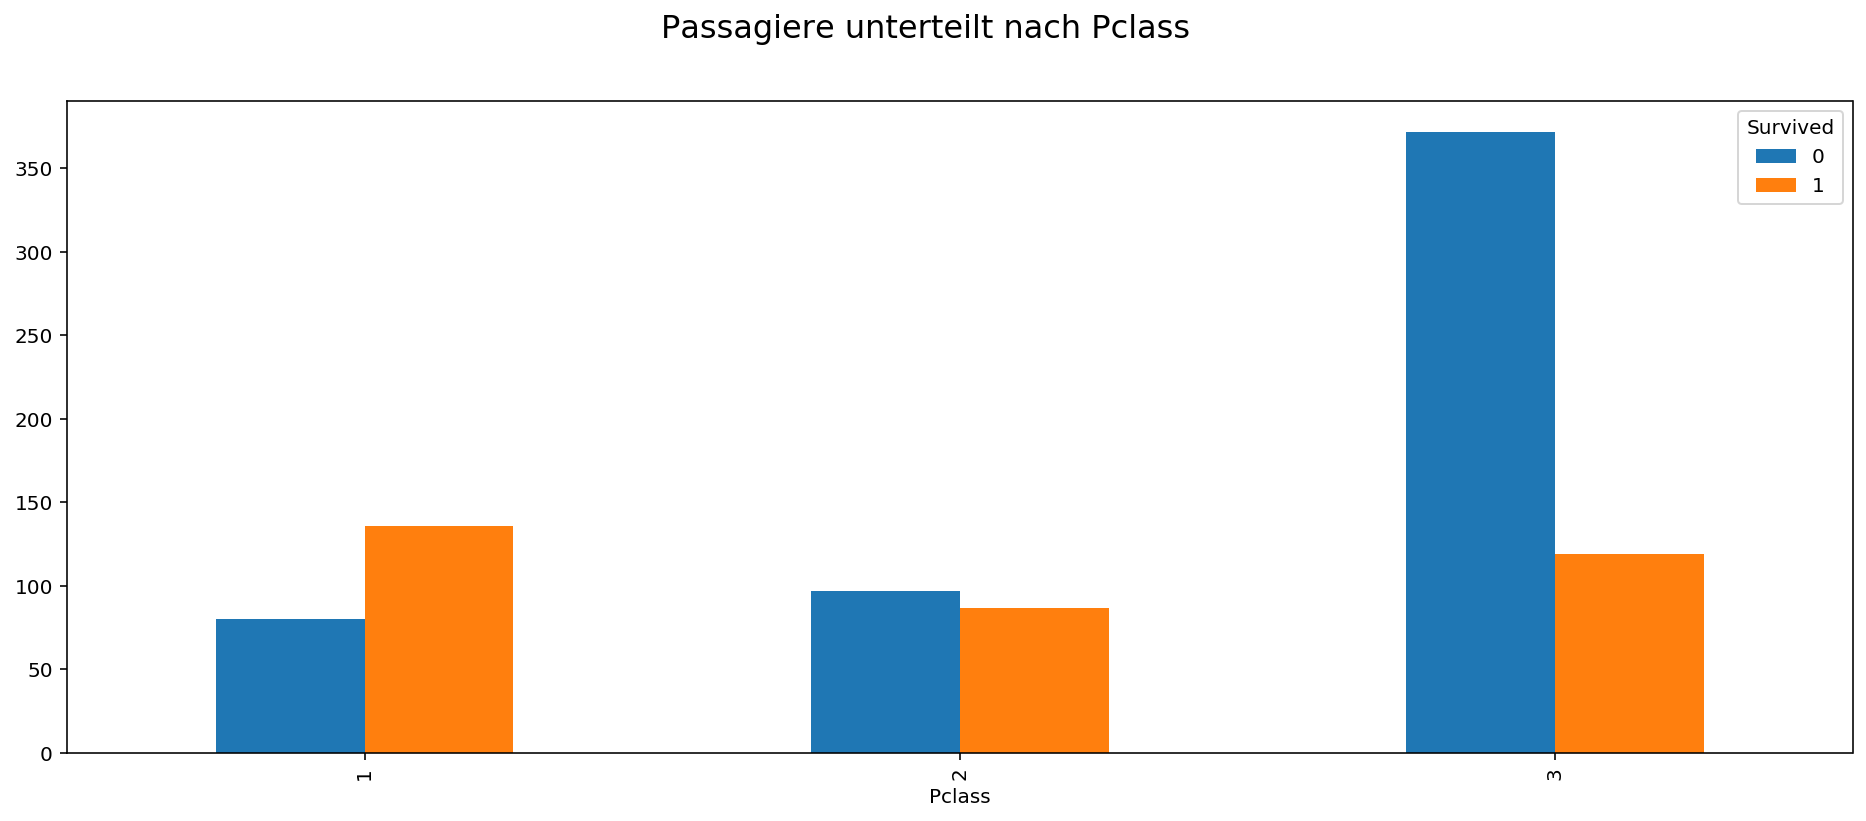

In [48]:
def plot_column(column):
    if df[column].dtype == np.float:
        fig = plot_numerical(column)
    else:
        fig = plot_categorial(column)
    fig.suptitle(f'Passagiere unterteilt nach {column} ', fontsize=16)
    return fig

cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
fig = pn.interact(plot_column, column=cols)
fig

# Basic Data Preparation

In [49]:
train_with_nas = train.copy()
test_with_nas = test.copy()

## Missing Values

Missing Values, also unbekannte Werte stellen für viele Machine Learning Algorithmen ein Problem dar (wenn auch nicht für alle), da sie im wesentlichen mit nummerischen Werten arbeiten. Grundsätzlich ist es daher eine gute Idee fehlende Werte zu ersetzen. Hierfür gibt es zahlreiche Möglichkeiten, wie etwa:

* Das ersetzen mit einem fest definiertem Wert
    * Für numerische Werte nutzt man den Durchschnittswert (average) oder den Mittelwert (median).
    * Für kategorische Werte empfiehlt sich die häufigsten Klasse
    
* Das ersetzen mit einem repräsentativen Wert
    * Equivalent zu oben, allerdings wird der Wert innerhalb einer repräsentativen Subgruppe gebildet
    * Automatische Bildung mehrer Cluster (etwa via kNN)
    
* Das ersetzen mit einem algorithmisch bestimmten Werts
    * Regressions- und Klassifikationsmodelle
    * Deep Learning

In [50]:
df = train.append(test)
df.isnull().sum().sort_values(ascending=False)

Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
Ticket         0
Parch          0
SibSp          0
Sex            0
Name           0
Pclass         0
dtype: int64

In [51]:
default_age = train.Age.median()

for df in [train, test]:
    df.Age.fillna(default_age, inplace=True)

In [52]:
default_price = train.Fare.mean()

for df in [train, test]:
    df.Fare.fillna(default_price, inplace=True)

In [53]:
default_harbor = train.Embarked.mode()[0]

for df in [train, test]:
    df.Embarked.fillna(default_harbor, inplace=True)

In [54]:
df = train.append(test)
df.isnull().sum().sort_values(ascending=False)

Cabin       1014
Survived     418
Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
dtype: int64

**Alternative** Scikit-Learn Missing Value Imputer

In [55]:
train.Embarked.values.reshape(-1, 1)[:5]

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S']], dtype=object)

In [56]:
from sklearn.impute import SimpleImputer

embarked_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
embarked_imp.fit_transform(train.Embarked.values.reshape(-1, 1))
without_nas = embarked_imp.transform(test.Embarked.values.reshape(-1, 1))

# Check if there are still NAs?
pd.Series(np.ravel(without_nas)).isna().sum()

0

## Feature Transformation

Nicht nur Missing Values sind problematisch für Algorithmen, sondern auch andere nicht nummerische Werte. Zwar wandeln zahlreiche Verfahren etwa Boolean-Werte automatisch in eine 1/0 Darstellung um, dennoch empfiehlt es sich auch hier Zeichenketten (strings) und kategoriale Werte entsprechend umzuwandeln. Gängige Verfahren sind:

* Binarize: Darstellung in Binärzahlen (1 und 0 für True und False)
* [One Hot Encoding](http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)
* Dummy Encoding

In [57]:
from sklearn.preprocessing import label_binarize
for df in [train, test]:
    df['Sex'] = label_binarize(df.Sex, ['male', 'female'])

In [58]:
from sklearn.preprocessing import LabelEncoder
harbour_encocer = LabelEncoder()
harbour_encocer.fit(train.Embarked)
for df in [train, test]:
    df["Embarked"] = harbour_encocer.transform(df.Embarked)

In [59]:
df.dtypes

Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked      int64
dtype: object

In [60]:
df.select_dtypes(exclude=[np.number])

,Name,Ticket,Cabin
0,"Kelly, Mr. James",330911,NaN
1,"Wilkes, Mrs. James (Ellen Needs)",363272,NaN
2,"Myles, Mr. Thomas Francis",240276,NaN
3,"Wirz, Mr. Albert",315154,NaN
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",3101298,NaN
...,...,...,...
413,"Spector, Mr. Woolf",A.5. 3236,NaN
414,"Oliva y Ocana, Dona. Fermina",PC 17758,C105
415,"Saether, Mr. Simon Sivertsen",SOTON/O.Q. 3101262,NaN
416,"Ware, Mr. Frederick",359309,NaN


In [61]:
for df in [train, test]:
    df.drop(["Name","Ticket"], axis=1, inplace=True)

## einfaches Feature Engineering

Nicht alle Informationen lasssen sich so standardisiert in maschinell verarbeitbare Daten überführen. Beim Feature Engineering geht es darum, neue spalten zu erstellen, die für die algorithmen zusätzliche, wertvolle Informationen berreitstellen.

### Schiffskabine

Einige Passagiere haben eine Kabinennummer, anhand derer sich eventuell auf die Position im Boot (Deck, Innen- oder Außenkabine, Rumpf- oder Heckbereich) schließen lassen könnte, jedoch ist dies nicht offensichtlich. Dennoch bietet aufgrund der vielen fehlenden Werte allein die Information, dass ein Passagier eine Kabine hatte (das war nicht selbstverständlich) eine wertvolle Information die wir nutzen wollen.

In [62]:
len(train.loc[train.Cabin.isna()]) / len(train.Cabin)

0.7710437710437711

In [63]:
for df in [train, test]:
    df["has_cabin"] = ~df.Cabin.isna()
    
for df in [train, test]:
    df.drop("Cabin", axis=1, inplace=True)

### Familiengröße

Im Datensatz finden sich die zwei Spalten SibSp (=Siblings/Spouses, also Ehegatten oder Geschwister) und Parch (Eltern / Kinder). Diese etwas verwirrende Aufteilung lässt sich deutlich einfacher darstellen, in dem wir beide Werte einfach als Familiengröße zusammenfassen.

In [64]:
df.SibSp + df.Parch

0      0
1      1
2      0
3      0
4      2
      ..
413    0
414    0
415    0
416    0
417    2
Length: 418, dtype: int64

In [65]:
for df in [train, test]:
    df["family_size"] = df.SibSp + df.Parch

## Aufgaben

* Überprüfe, wie das Feature Familiengröße im Verhältnis zur Überlebenswahrscheinlichkeit steht
* Erstelle ein Feature, dass aussagt, ob eine Person alleine reist
* Erstelle eine Funktion, welche alle fehlenden Werte in einem DataFrame bereinigt und mache konfigurierbar, ob das DataFrame selbst oder eine Kopie bereinigt werden soll

### Analyse Familiengröße

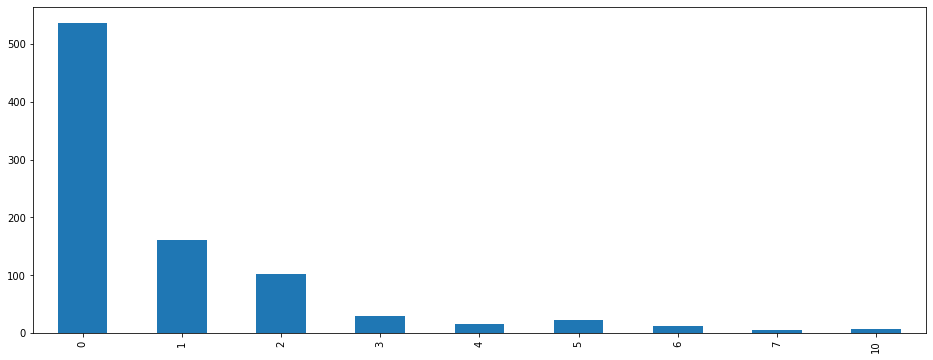

In [66]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 6]

train.family_size.value_counts().sort_index().plot(kind="bar")

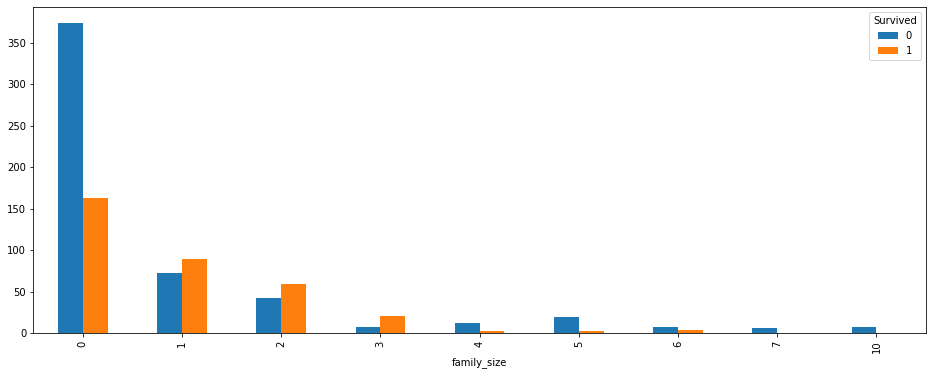

In [67]:
train.groupby(["family_size","Survived"]).size().unstack("Survived").plot(kind="bar")

### Alleinreinde-Feature

Zwar könnte angenommen werden, dass Algorithmen anhand der Familiengröße auch Alleinreisende identifizieren können. Allerdings ist längst nicht gewährleistet, dass Algorithmen entsprechende (komplexe) Zusammenhänge aufgreifen. Generell sollten daher wichtige Informationen in möglichst einfach verarbeitbaren Informationen dargereicht werden.

In [68]:
(df.SibSp + df.Parch) == 0

0       True
1      False
2       True
3       True
4      False
       ...  
413     True
414     True
415     True
416     True
417    False
Length: 418, dtype: bool

In [69]:
for df in [train, test]:
    df["is_alone"] = (df.SibSp + df.Parch) == 0


In [70]:
# Entfernen unnötiger Spalten

In [71]:
unused_columns = ["PassengerId", "SibSp", "Parch", "Name", "Ticket", "Cabin"]

for df in [train, test]:
    df.drop(columns=unused_columns, inplace=True, errors='ignore')

### Missing Value Funktion

In [72]:
from sklearn.impute import SimpleImputer

def fill_missing_values(df, copy=False):
    if copy:
        df = df.copy()
        
    fill_na_strategies = {
        "Age": "median",
        "Fare": "mean",
        "Embarked": "most_frequent"
    }
    
    for col, strategy in fill_na_strategies.items():
        print(f"Fill {df[col].isna().sum()} in {col} by {strategy}")
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
        df[col] = imp.fit_transform(df[col].values.reshape(-1, 1))
    return df

fill_missing_values(train_with_nas, copy=True)

Fill 177 in Age by median
Fill 0 in Fare by mean
Fill 2 in Embarked by most_frequent


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Entferne nicht benötite Spalten

# Machine Learning (Modeling 1)

Überprüfe erneut, ob nur nummerische und boolean Werte vorkommen und fehlenden Werte mehr existieren (mit ausnahme von Survived im testset)

In [73]:
# Check the again the data
# There should be only bool and numeric columns and no NAs beside from Survived (which of course is unkown in the testset)
df = train.append(test)
pd.DataFrame(zip(df.columns, df.dtypes, df.isna().sum()), columns=["column", "type", "NAs"])

,column,type,NAs
0,Survived,float64,418
1,Pclass,int64,0
2,Sex,int64,0
3,Age,float64,0
4,Fare,float64,0
5,Embarked,int64,0
6,has_cabin,bool,0
7,family_size,int64,0
8,is_alone,bool,0


In [74]:
X = train.drop(columns="Survived")
y = np.ravel(train[['Survived']])

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)

(668, 8)
(223, 8)


## Entscheidungsbaum

In [77]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

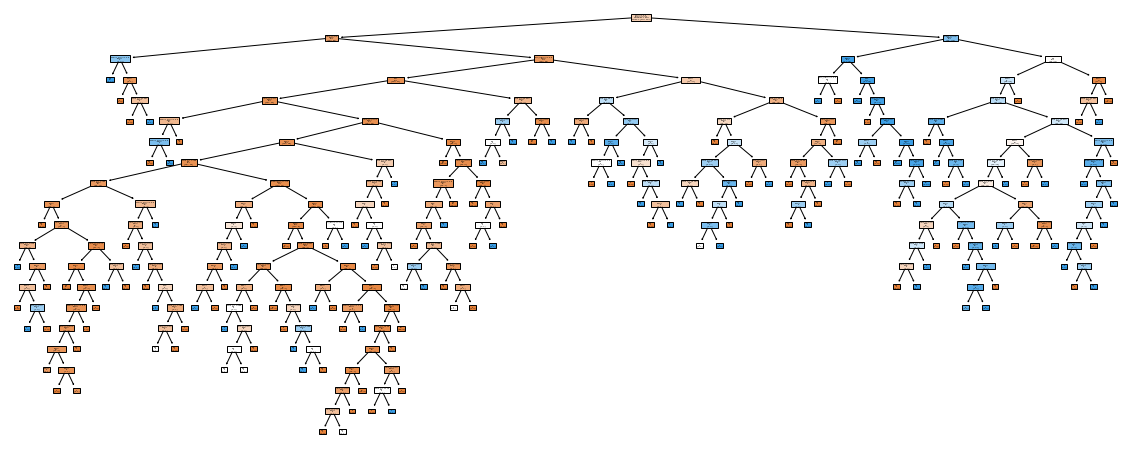

In [78]:
from sklearn.tree._export import plot_tree
figsize(20, 8)
fig = plot_tree(classifier, label='root', feature_names = X.columns, impurity=True, filled=True) 

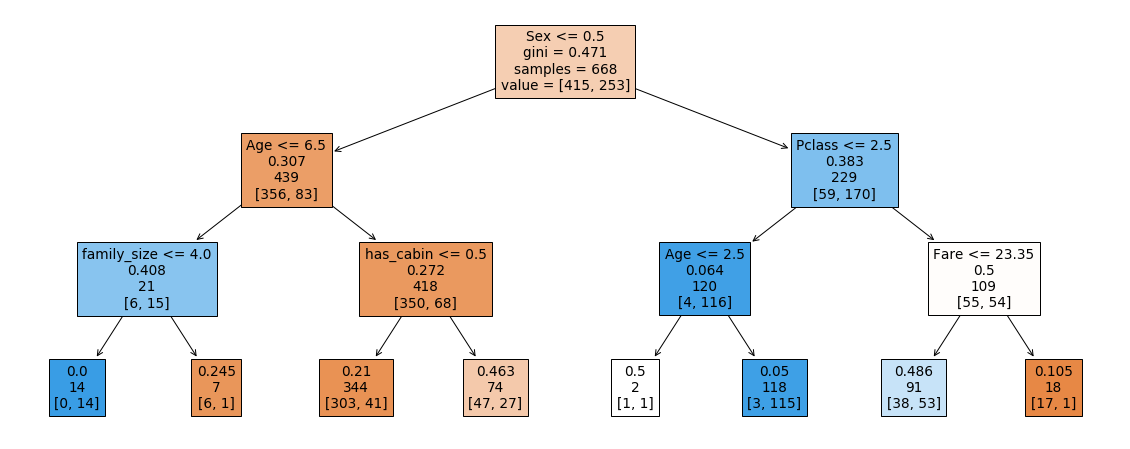

In [79]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

figsize(20, 8)
fig = plot_tree(classifier, label='root', feature_names = X.columns, impurity=True, filled=True) 

## Modell-Bewertung

In [80]:
predictions = classifier.predict(X_test)

In [81]:
pd.DataFrame(zip(predictions, y_test), columns=["predicted", "actual"]).sample(5, random_state=1)

,predicted,actual
84,0,0
34,0,1
118,1,1
58,1,1
119,0,0


In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
tn, fp, fn, tp = cm.ravel()
pd.DataFrame(cm)

,0,1
0,118,16
1,27,62


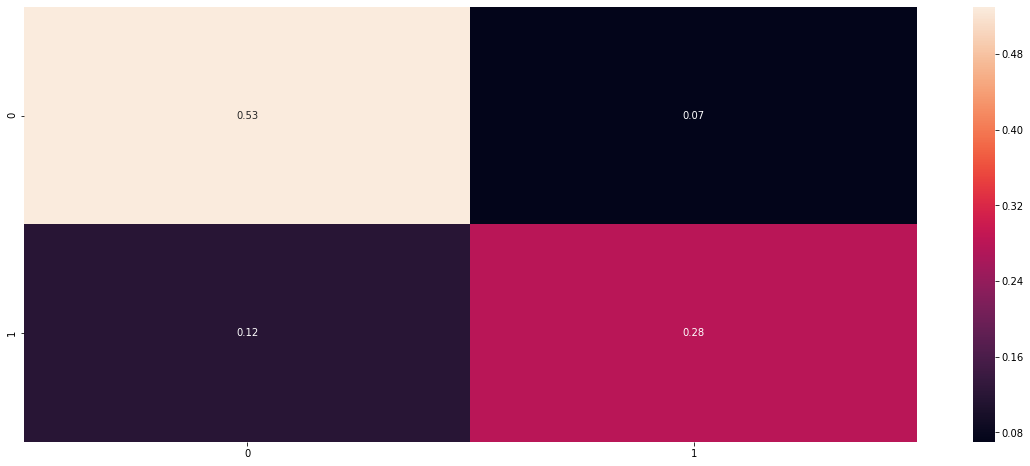

In [83]:
sns.heatmap((pd.DataFrame(cm)/len(predictions)).round(decimals=2), annot=True)

![Binäre Klassifikationsmetriken](static/metrics.png)

### False Positive Rate / Fehler 1. Art 

Wie viele der positiven Ereignisse (Passagier überlebt) wurden falsch vorhergesagt?

=> Bei wie vielen dachten wir, sie werden ertrinken, obwohl sie überlebt haben

In [84]:
false_positive_rate = fp / (fp + tn)
false_positive_rate

0.11940298507462686

### False Negative Rate / Fehler 2. Art 

Wie viele der negativen Ereignisse (verstorben) wurden falsch vorhergesagt?

=> Bei wie vielen dachten wir, sie werden ertrinken, obwohl sie überlebt haben

In [85]:
false_negative_rate = fn / (tp + fn)
false_negative_rate

0.30337078651685395

### True Negative Rate / Specificity / Spezifität 

Wie viele der negativen Ereignisse (verstorben) haben wir korrekt vorhergesagt

In [86]:
specificity = tn / (tn + fp)
specificity

0.8805970149253731

### True Positive Rate / Recall / Sensitivität

Wie viele der positiven Ereignisse (überlebt) haben wir korrekt vorhergesagt

In [87]:
recall = tp / (tp + fn)
recall

# oder auch
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.6966292134831461

### Positive Predictive Value / Precision / Genauigkeit
Wie viele der positiv vorhergesagten Ereignisse waren auch positiv (haben auch überlebt)

In [88]:
precision = tp/ (tp + fp)

# oder auch
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.7948717948717948

### Accuracy

Wie viele der vorhersagen stimmen?

In [89]:
accuracy = (tp + tn) / (tp + fp + fn + tn)

# oder auch
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8071748878923767

### F1-Score

Das harmonische Mittel zwischen Precision und Recall

In [90]:
f1 = 2 * precision * recall / (precision + recall)

# oder auch
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7425149700598802

## Modell-Analyse

In [91]:
classifier.feature_importances_

array([0.16568612, 0.6017782 , 0.08525382, 0.05448605, 0.        ,
       0.0480124 , 0.04478342, 0.        ])

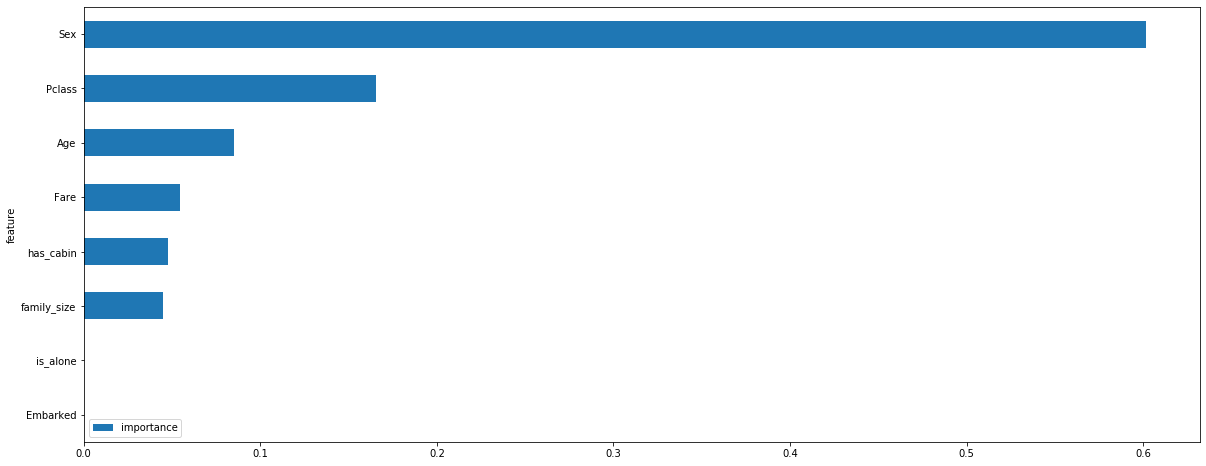

In [92]:
pd.DataFrame(zip(X.columns, classifier.feature_importances_), columns=["feature", "importance"])\
.set_index("feature").sort_values("importance")\
.plot.barh()

## Cross-Validation

In [93]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, scoring = "accuracy", cv=10)
print(cv_scores)
np.mean(cv_scores)

[0.8        0.83146067 0.76404494 0.85393258 0.82022472 0.78651685
 0.78651685 0.78651685 0.84269663 0.83146067]


0.8103370786516855

In [94]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, scoring = "accuracy", cv=2)
print(cv_scores)
np.mean(cv_scores)

[0.74439462 0.80898876]


0.7766916914395123

## Learning Curves

From the [Scikit-Learn Documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)

In [95]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Automatically created module for IPython interactive environment


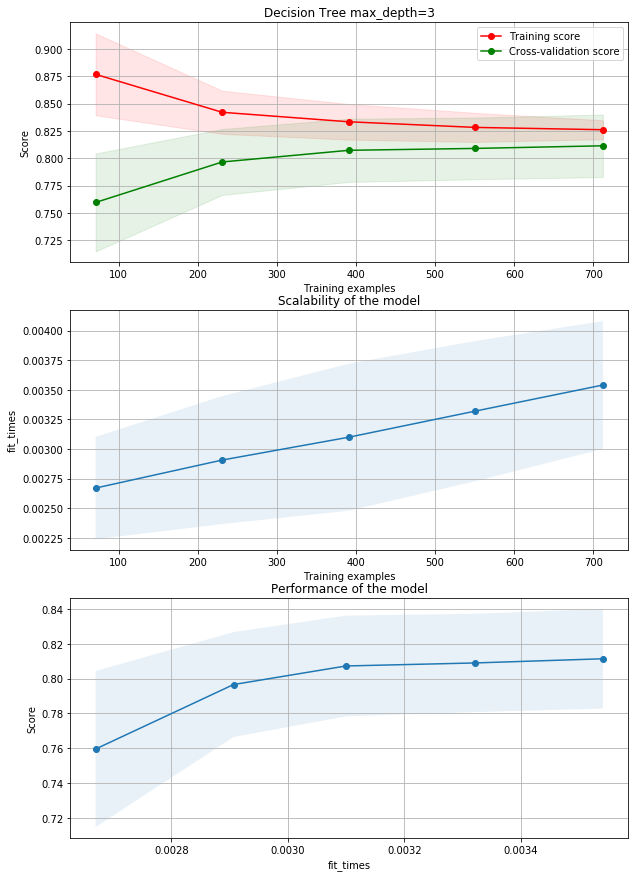

In [96]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(classifier, "Decision Tree max_depth=3", X, y, axes=axes[:], cv=cv, n_jobs=4)

plt.show()

## Aufgaben
* Erstelle eine Funktion, welche die wichtigsten Metriken berechnet und darstellt
* Probiere verschiedene Parameter für den Entscheidungsbaum aus und analysiere die Auswirkungen

### Scoring Funktion

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))

              precision    recall  f1-score   support

    Survived       0.81      0.88      0.85       134
       Drown       0.79      0.70      0.74        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



* Precision: Anteil der als positiv prognostizierten Werte waren auch wirklich positiv
* Recall: Anteil der positiven Werte, die korrekt prognostiziert wurden
* F1: Harmonisches Mittel aus Precision und Recall
* support: Absolute Anzahl der wahren Ereignisse

In [98]:
def get_scores(y_test, predictions):
    report = classification_report(y_test, predictions, target_names=["Survived", "Drown"], output_dict=True)
    res = report["weighted avg"]
    res["accuracy"] = report["accuracy"]
    return res

get_scores(y_test, predictions)

{'precision': 0.8062415498011601,
 'recall': 0.8071748878923767,
 'f1-score': 0.8046255721355398,
 'support': 223,
 'accuracy': 0.8071748878923767}

### Verprobe unterschiedliche Modellparameter

In [99]:
baseline_predictions = predictions.copy()
baseline = pd.Series(get_scores(y_test, predictions))

In [100]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

precision   -0.010945
recall      -0.031390
f1-score    -0.043987
support      0.000000
accuracy    -0.031390
dtype: float64


# Modeling 2

## HyperParameter Tuning

In [101]:
from sklearn.model_selection import RandomizedSearchCV

dt_hpt_params = dict()
dt_hpt_params["max_depth"] = [2,3,5,10,None]
dt_hpt_params["min_samples_leaf"] = [1,2,3,5,10]
dt_hpt_params["min_samples_split"] = [1, 2, 3,4,5,10]

In [102]:
dt = DecisionTreeClassifier()
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = dt_hpt_params,\
                               n_iter = 50, scoring="f1", cv = 5, verbose=2, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [103]:
dt_random.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 3}

precision    0.0
recall       0.0
f1-score     0.0
support      0.0
accuracy     0.0
dtype: float64
              precision    recall  f1-score   support

    Survived       0.81      0.88      0.85       134
       Drown       0.79      0.70      0.74        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



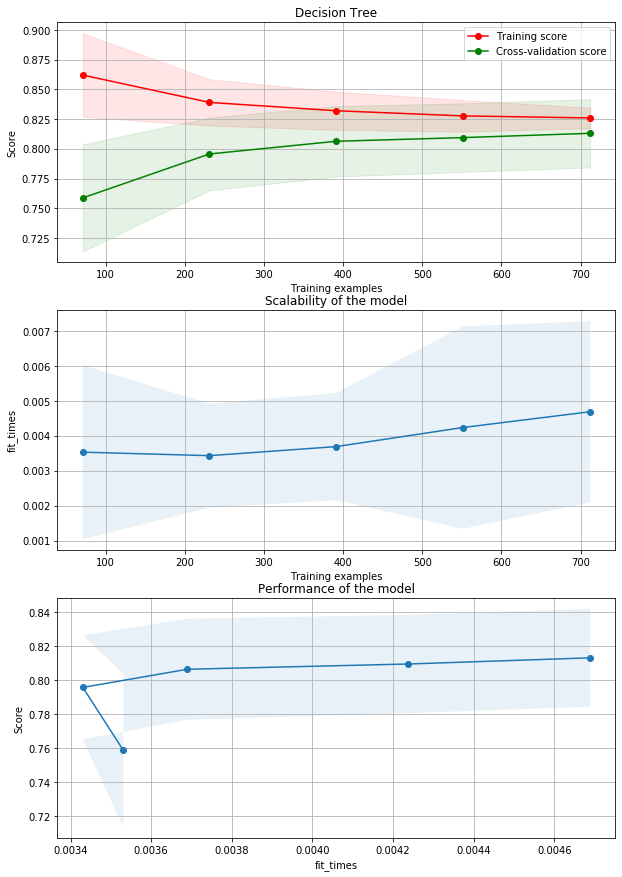

In [104]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

classifier = DecisionTreeClassifier(**dt_random.best_params_)
classifier.fit(X_train, y_train)
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

## Logistic Regresion

/Users/nicokreiling/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


precision    0.0
recall       0.0
f1-score     0.0
support      0.0
accuracy     0.0
dtype: float64
              precision    recall  f1-score   support

    Survived       0.81      0.88      0.85       134
       Drown       0.79      0.70      0.74        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



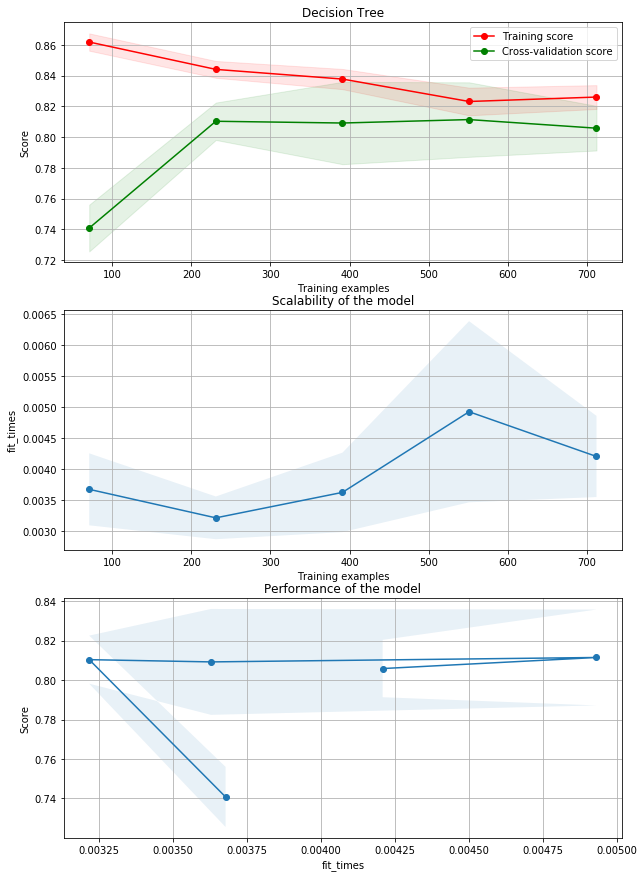

In [105]:
from sklearn.model_selection import StratifiedKFold
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

cv = StratifiedKFold(n_splits=5, random_state=42)

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

## Vergleich verschiedener Algorithmen

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

cv = StratifiedKFold(n_splits=5, random_state=42)

X_train = train.drop(columns="Survived")
y_train = train[['Survived']]

classifiers = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), GradientBoostingClassifier()]

algorithm_names = []
cv_means = []
cv_std = []
for classifier in classifiers:
    classifier.random_state=42
    algorithm_names.append(type(classifier).__name__)
    cv_result = cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv = cv, n_jobs=-1)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
#algorithm_names = ["SVC","DecisionTree","AdaBoost","RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]
cv_res = pd.DataFrame({"mean":cv_means,"std": cv_std,"Algorithm":algorithm_names})

/Users/nicokreiling/anaconda3/envs/ds/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [107]:
cv_res

,mean,std,Algorithm
0,0.713823,0.051985,DecisionTreeClassifier
1,0.732738,0.026067,LogisticRegression
2,0.579964,0.032954,KNeighborsClassifier
3,0.757270,0.042832,GradientBoostingClassifier


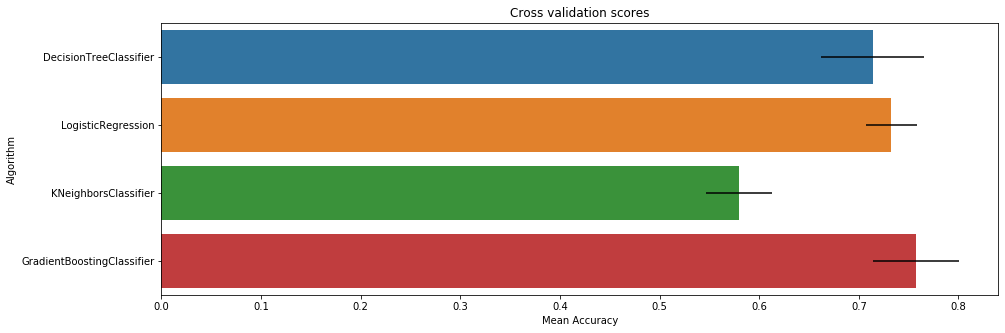

In [108]:
figsize(15,5)
g = sns.barplot("mean","Algorithm",data = cv_res, xerr=cv_std)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

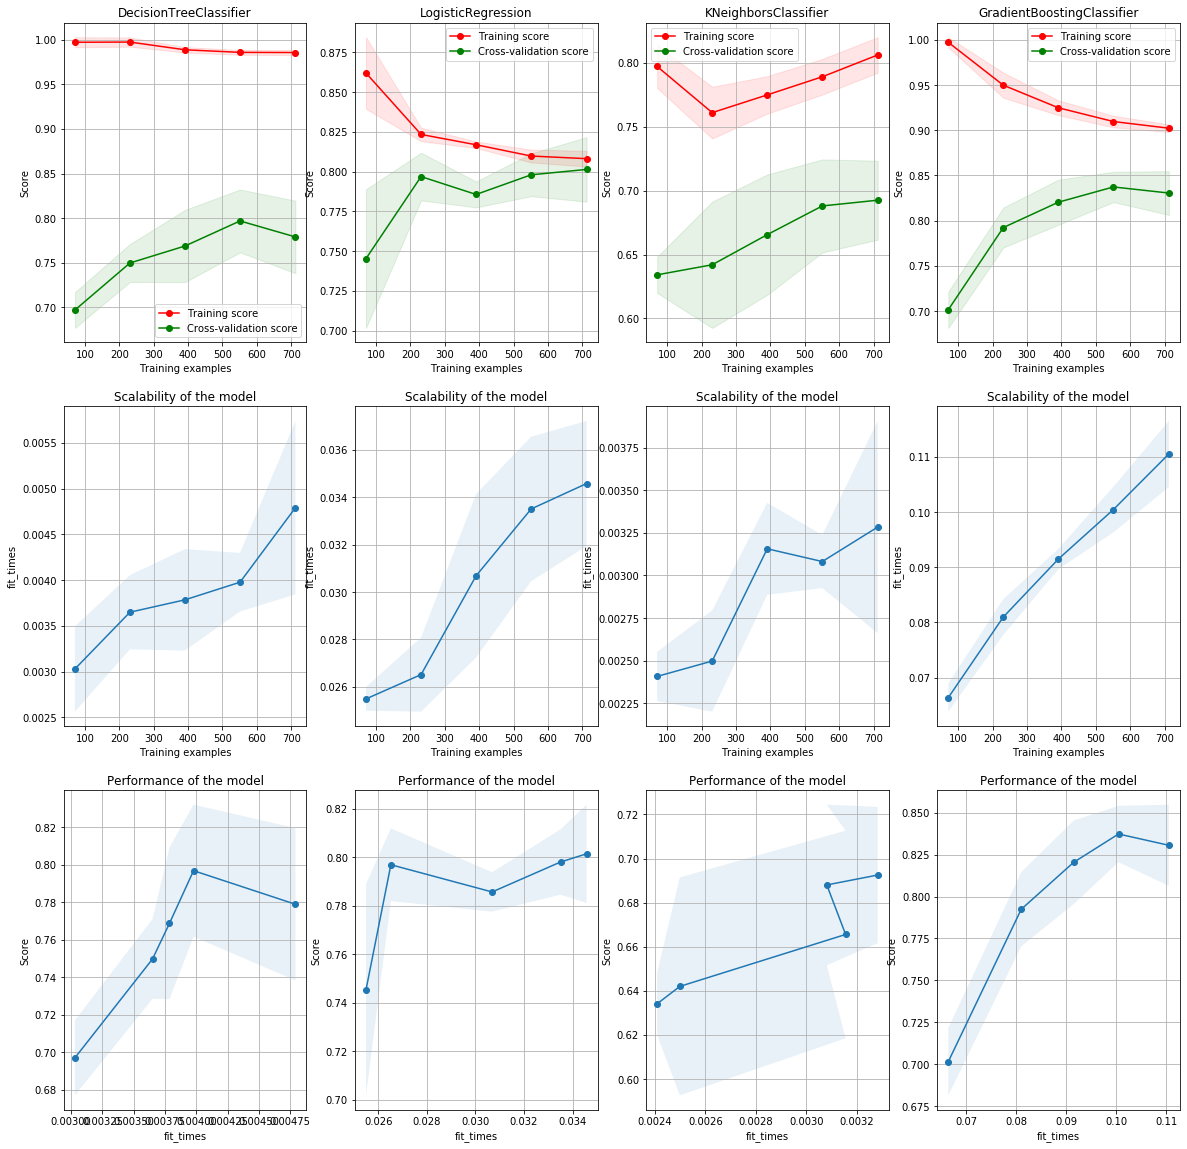

In [109]:
fig, axes = plt.subplots(3, len(classifiers), figsize=(20, 20))

for i, estimator in enumerate(classifiers):
    title = f"{estimator.__class__.__name__}"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, i],
                        cv=cv, n_jobs=4)

plt.show()

## Aufgaben

* Erstelle ein möglichst gutes Klassifikations-Modell

In [110]:
from sklearn.model_selection import RandomizedSearchCV

gb_hpt_params = dict()
gb_hpt_params["n_estimators"] = [8, 16, 32, 64, 100, 200]
gb_hpt_params["min_samples_split"] = [2,3,5,10,50]
gb_hpt_params["min_samples_leaf"] = [1, 2, 4, 8, 16, 32, 64, 100, 200]
gb_hpt_params["max_depth"] = [2, 3, 4, 8]
gb_hpt_params["max_features"] = list(range(3,train.shape[1]))
gb_hpt_params["learning_rate"] = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

In [111]:
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X_train = train.drop(columns="Survived")
y_train = np.ravel(train[['Survived']])

gb = GradientBoostingClassifier()
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = gb_hpt_params, \
                               n_iter = 100, scoring="f1", cv = 5, verbose=2, random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:   12.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [112]:
gb_random.best_params_

{'n_estimators': 16,
 'min_samples_split': 3,
 'min_samples_leaf': 8,
 'max_features': 6,
 'max_depth': 4,
 'learning_rate': 0.5}

precision    0.095201
recall       0.094170
f1-score     0.096079
support      0.000000
accuracy     0.094170
dtype: float64
              precision    recall  f1-score   support

    Survived       0.90      0.94      0.92       134
       Drown       0.90      0.84      0.87        89

    accuracy                           0.90       223
   macro avg       0.90      0.89      0.90       223
weighted avg       0.90      0.90      0.90       223



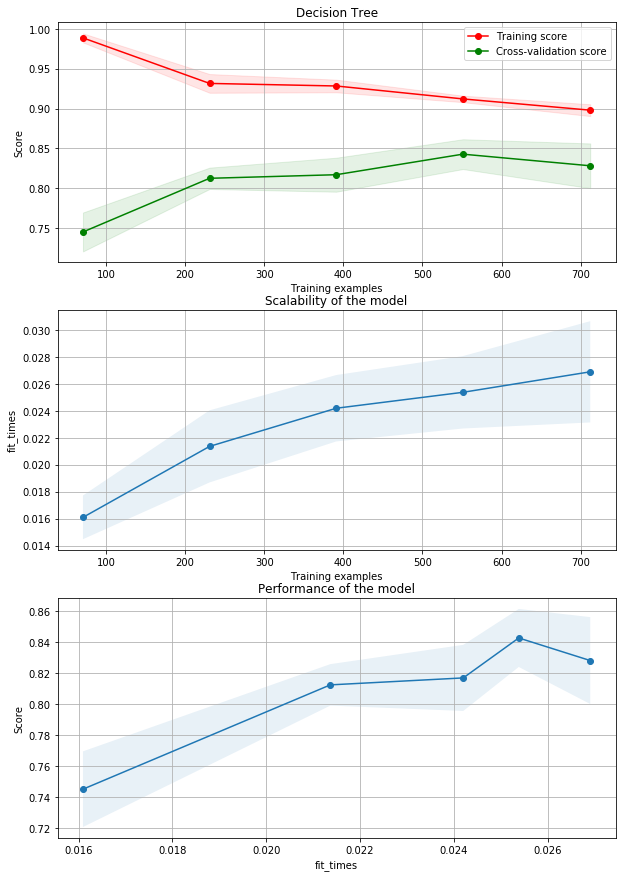

In [113]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

classifier = GradientBoostingClassifier(**gb_random.best_params_)
classifier.fit(X_train, y_train)
plot_learning_curve(classifier, "Decision Tree", X, y, axes=axes[:], cv=cv, n_jobs=4)

predictions = classifier.predict(X_test)
diff = pd.Series(get_scores(y_test, predictions))-baseline
print(diff)

print(classification_report(y_test, predictions, target_names=["Survived", "Drown"]))
plt.show()

In [114]:
bt_predictions = predictions.copy()
bt_baseline = pd.Series(get_scores(y_test, predictions))
bt_classifier = classifier

In [115]:
gb_random.best_params_

{'n_estimators': 16,
 'min_samples_split': 3,
 'min_samples_leaf': 8,
 'max_features': 6,
 'max_depth': 4,
 'learning_rate': 0.5}

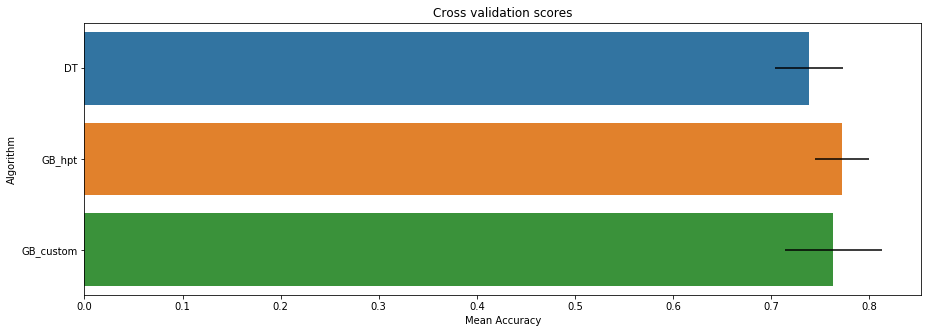

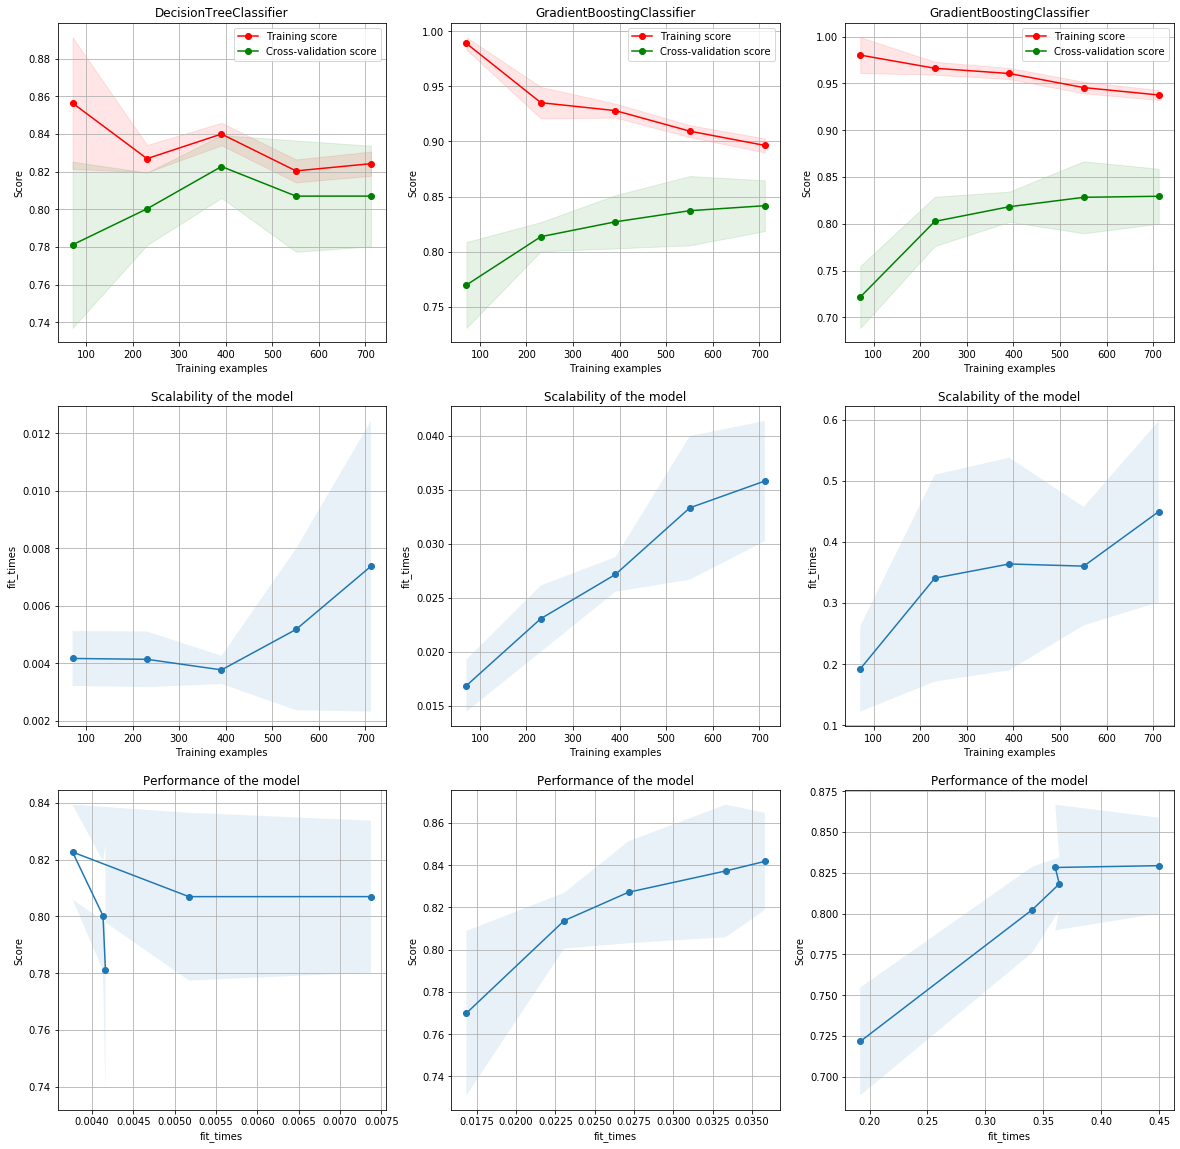

In [116]:
classifiers = [DecisionTreeClassifier(max_depth=3),GradientBoostingClassifier(**gb_random.best_params_)]

gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}
classifiers.append(GradientBoostingClassifier(**gb_params))

algorithm_names = ["DT", "GB_hpt", "GB_custom"]
cv_means = []
cv_std = []
for classifier in classifiers:
    classifier.random_state=42
    cv_result = cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv = cv, n_jobs=-1)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_res = pd.DataFrame({"mean":cv_means,"std": cv_std,"Algorithm":algorithm_names})

figsize(15,5)
g = sns.barplot("mean","Algorithm",data = cv_res, xerr=cv_std)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

fig, axes = plt.subplots(3, len(classifiers), figsize=(20, 20))

for i, estimator in enumerate(classifiers):
    title = f"{estimator.__class__.__name__}"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, i],
                        cv=cv, n_jobs=4)

plt.show()

# Evaluation & Deployment

## Define pipeline

In [153]:
def train_pipe():
    train = pd.read_csv("./data/titanic/train.csv")
    X = train.drop(columns="Survived")
    y = np.ravel(train[['Survived']])

    gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}
    pipe = Pipeline(steps=[("prepare",ModelPreperation()), ("clr",GradientBoostingClassifier(**gb_params))])
    return pipe.fit(X, y)
pipe = train_pipe()

     PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket  

## Build API

In [15]:
%load_ext autoreload

In [18]:
%autoreload 2

In [19]:
%%writefile model_preperation.py
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import label_binarize
import pandas as pd

def get_title(names):
    titles = names.str.extract(r' ([A-Za-z]+)\.', expand=False)
    titles = titles.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    titles = titles.replace('Mlle','Miss')
    titles = titles.replace('Ms','Miss')
    titles = titles.replace('Mme','Mrs')
    return titles

class ModelPreperation(TransformerMixin):
    #Class Constructor 
    def __init__( self ):
        self.title_encoder = LabelEncoder()
        pass
     
    def fit( self, X, y=None):
        self.default_age = X.Age.median()
        self.default_price = X.Fare.mean()
        self.default_harbor = X.Embarked.mode()[0]
        self.embarked_categories = list(X.Embarked.dropna().unique())
        self.title_encoder.fit(get_title(X.Name))
        return self
        
    def transform(self, df):
        df = df.copy()
        df["Age"].fillna(self.default_age, inplace=True)
        df["Fare"].fillna(self.default_price, inplace=True)
        df["Embarked"].fillna(self.default_harbor, inplace=True)
        df['Sex'] = label_binarize(df.Sex, ['male', 'female'])
        df["has_cabin"] = ~df.Cabin.isna()
        df["title"] = self.title_encoder.transform(get_title(df.Name))
        df = df.drop(columns=["Cabin","Name","Ticket","PassengerId"], errors='ignore')
        df["Embarked"] = df.Embarked.astype("category").cat.set_categories(self.embarked_categories)
        df = pd.get_dummies(df, ["Embarked"], columns=["Embarked"], drop_first=True)
        return df


Overwriting model_preperation.py


In [28]:
%%writefile train_without_mlflow.py
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
#from model_preperation import ModelPreperation
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import logging
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

np.random.seed(40)
train = pd.read_csv("./data/titanic/train.csv")
X = train.drop(columns="Survived")
y = np.ravel(train[['Survived']])

gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}

clf = GradientBoostingClassifier(**gb_params)
pipe = Pipeline(steps=[("prepare",ModelPreperation()), ("clf", clf)])
cv_result = cross_val_score(pipe, X, y = y, scoring = "accuracy", cv = 5, n_jobs=-1)

train = pd.read_csv("./data/titanic/train.csv")
X = train.drop(columns="Survived")
y = np.ravel(train[['Survived']])
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('prepare', <__main__.ModelPreperation object at 0x1a2a6bafd0>),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.25, loss='deviance',
                                            max_depth=3, max_features=5,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=16,
                                            min_samples_split=16,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=200,
                                            n_iter_no_change=None,
                                        

In [4]:
import cloudpickle
input_data = {
    "PassangerId": 1,
    "Pclass": 3, 
    "Name": 'Nico, Mr. Kreiling',
    "Sex": 'male',
    "Age": 30,
    "SibSp": 4,
    "Parch": 0,
    "Ticket": "abc",
    "Fare": 100,
    'Cabin': "ab",
    "Embarked": 'S'
}
with open("./mlruns/0/4689f4918d9c4c5aa3f073dcd2d6adb6/artifacts/model/model.pkl", "rb") as f:
    pipe = cloudpickle.load(f)
    input_data = pd.Series(dict(input_data)).to_frame().transpose()    
    prediction = pipe.steps[0][1].transform(input_data) 
prediction

  PassangerId Pclass                Name   Sex Age SibSp Parch Ticket Fare  \
0           1      3  Nico, Mr. Kreiling  male  30     4     0    abc  100   

  Cabin Embarked  
0    ab        S  
Index(['PassangerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'has_cabin', 'title', 'Embarked_C', 'Embarked_Q'],
      dtype='object')


,PassangerId,Pclass,Sex,Age,SibSp,Parch,Fare,has_cabin,title,Embarked_C,Embarked_Q
0,1,3,0,30,4,0,100,True,2,0,0


In [71]:
%%writefile api/autoapi/api.py

import cloudpickle
from fastapi import FastAPI
from pydantic import BaseModel
from model_preperation import ModelPreperation
#from autoapi.model_preperation import ModelPreperation
import joblib
from sklearn.pipeline import FeatureUnion, Pipeline 

app = FastAPI()

import numpy as np 
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

class Passenger(BaseModel):
    PassengerId: float = 1
    Pclass: str = 3
    Name: str = 'Nico, Rare. Kreiling'
    Sex: str = 'F'
    Age: int = 30
    SibSp: float = 0
    Parch: float = 3
    Ticket: str = ''
    Fare: float = 100
    Cabin: str = ''
    Embarked: str = 'C'
        
@app.get("/")
async def root():
    return {"message": "Hello World"}

@app.get("/survived/passanger_id/{user_id}")
async def read_item(user_id):
    return {"item_id": user_id}

@app.post("/survived/custom")
async def root(input_data: Passenger):
    with open("./model.pkl", "rb") as f:
        pipe = cloudpickle.load(f)
    input_data = pd.Series(dict(input_data)).to_frame().transpose()
    print(input_data)
    prediction = pipe.predict(input_data)
    if prediction[0] == 0:
        return {"message": "Sorry, you die!"}
    else:
        return {"message": "Yeaaah, you will survive :)"}
    

Writing api/autoapi/api.py


In [74]:
import requests
form_data = {
    "PassangerId": 1,
    "Pclass": 3, 
    "Name": 'Nico, Mrs. Kreiling',
    "Sex": 'F',
    "Age": 30,
    "SibSp": 4,
    "Parch": 0,
    "Ticket": "abc",
    "Fare": 100,
    'Cabin': "ab",
    "Embarked": 'C'
}
r = requests.post('http://127.0.0.1:8000/survived/custom', json=form_data)
r.status_code
r.json()["message"]

'Yeaaah, you will survive :)'

# Bonus

## Title

In [ ]:
train_raw.Name.sample(10)

In [ ]:
train_raw.Name.str.extract(' ([A-Za-z]+)\.', expand=False).value_counts().plot(kind="bar")

In [ ]:
def get_title(df):
    titles = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    titles = titles.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    titles = titles.replace('Mlle','Miss')
    titles = titles.replace('Ms','Miss')
    titles = titles.replace('Mme','Mrs')
    return titles

get_title(train_raw).value_counts().plot(kind="bar")

In [ ]:
train["title"] = get_title(train_raw)
test["title"] = get_title(test_raw)

from sklearn.preprocessing import LabelEncoder
title_encoder = LabelEncoder()
title_encoder.fit(train.title)
for df in [train, test]:
    df["title"] = title_encoder.transform(df.title)

## Auto-Features (PClass * Age)

In [ ]:
for df in [train, test]:
    df["comb"] = df.Pclass * df.Age

## Aufgabe 
Analysiere den Einfluss der neuen Features auf dein Modell

In [ ]:
train.columns

In [ ]:
gb_params = {'n_estimators': 200,'min_samples_split': 16,'min_samples_leaf': 16,'max_features': 5,'max_depth': 3,'learning_rate': 0.25}

algorithm_names = ["mit neuen Features", "ohne neue Features"]
cv_means = []
cv_std = []
fe = []

for dataset in [train, train.drop(columns=["title", "comb"])]:
    X_train = dataset.copy().drop(columns="Survived")
    y_train = dataset[['Survived']]
    classifier.random_state=42
    cv_result = cross_val_score(classifier, X_train, y = y_train, scoring = "f1", cv = cv, n_jobs=-1)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    clf = GradientBoostingClassifier(**gb_params).fit(X_train, y_train)
    fe.append(pd.DataFrame(zip(X_train.columns, clf.feature_importances_), columns=["feature", "importance"]))
cv_res = pd.DataFrame({"mean":cv_means,"std": cv_std,"Algorithm":algorithm_names})

In [ ]:
fe[0].set_index("feature").sort_values("importance").plot.barh()

In [ ]:
fe[1].set_index("feature").sort_values("importance").plot.barh()

In [ ]:
cv_res

In [ ]:
figsize(15,5)
g = sns.barplot("mean","Algorithm",data = cv_res, xerr=cv_std)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [ ]:
%matplotlib inline
figsize(12, 7)

sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="PiYG")

## Bucket Numerical Features and 1-hot encode

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#float_cols = list(train.dtypes[train.dtypes == float].index)
float_cols = ['Age', 'Fare', 'comb', 'family_size']
scaler.fit(train[float_cols])

for df in [train, test]:
    df[float_cols] = scaler.transform(df[float_cols])

In [ ]:
print(list(train.dtypes[train.dtypes == int].index))
dummie_cols = ['Pclass', 'Embarked', 'title']    
for c in dummie_cols:  
    print(c)
    for df in [train, test]:
        if len(df[c].unique()) > 2:
            dummies = pd.get_dummies(df[c], prefix=c, drop_first=False)
            for d in dummies:
                df[d] = dummies[d]
            df.drop(columns=c, inplace=True)